# TO predict the Global_Active_power

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("hpc_breakdowns.csv")
df.head()

,Unnamed: 0,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [3]:
df.columns

Index(['Unnamed: 0', 'Date', 'Time', 'Global_active_power',
       'Global_reactive_power', 'Voltage', 'Global_intensity',
       'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'],
      dtype='object')

In [4]:
df.drop('Unnamed: 0',1,inplace=True)
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049280 entries, 0 to 2049279
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 140.7+ MB


In [6]:
100*round(df.isnull().sum()/len(df),5)

Date                     0.000
Time                     0.000
Global_active_power      0.100
Global_reactive_power    0.023
Voltage                  0.099
Global_intensity         0.098
Sub_metering_1           0.063
Sub_metering_2           0.059
Sub_metering_3           0.006
dtype: float64

In [7]:
df.shape

(2049280, 9)

In [8]:
df['DateTime'] = df.Date+' '+df.Time
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,16/12/2006 17:24:00
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,16/12/2006 17:25:00
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,16/12/2006 17:26:00
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,16/12/2006 17:27:00
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,16/12/2006 17:28:00


In [9]:
df['DateTime'] = pd.to_datetime(df['DateTime'], format= "%d/%m/%Y %H:%M:%S")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049280 entries, 0 to 2049279
Data columns (total 10 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   object        
 1   Time                   object        
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Global_intensity       float64       
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
 9   DateTime               datetime64[ns]
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 156.3+ MB


In [11]:
df.drop(['Date', 'Time'],1,inplace=True)
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049280 entries, 0 to 2049279
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    float64       
 1   Global_reactive_power  float64       
 2   Voltage                float64       
 3   Global_intensity       float64       
 4   Sub_metering_1         float64       
 5   Sub_metering_2         float64       
 6   Sub_metering_3         float64       
 7   DateTime               datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 125.1 MB


In [13]:
df.DateTime.max()

Timestamp('2010-11-26 21:02:00')

In [14]:
df.DateTime.min()

Timestamp('2006-12-16 17:24:00')

In [15]:
#df = df.set_index('DateTime')

In [16]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00


In [17]:
#df = df.reset_index()
df.drop('DateTime',1,inplace = True)

In [18]:
df.tail(200000)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1849280,0.376,0.208,237.01,1.8,0.0,0.0,1.0
1849281,0.380,0.218,239.24,1.8,0.0,0.0,0.0
1849282,0.378,0.216,238.64,1.8,0.0,0.0,1.0
1849283,0.378,0.218,239.13,1.8,0.0,0.0,1.0
1849284,0.376,0.214,238.32,1.8,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2049275,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2049276,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2049277,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2049278,0.934,0.000,239.70,3.8,0.0,0.0,0.0


# Dividing the dataset into train_test and validation sets

In [19]:
df_valid = df[df.index >= 1849280]
df_valid.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1849280,0.376,0.208,237.01,1.8,0.0,0.0,1.0
1849281,0.380,0.218,239.24,1.8,0.0,0.0,0.0
1849282,0.378,0.216,238.64,1.8,0.0,0.0,1.0
1849283,0.378,0.218,239.13,1.8,0.0,0.0,1.0
1849284,0.376,0.214,238.32,1.8,0.0,0.0,0.0


In [20]:
df_train = df[df.index < 1849280]
df_train.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1849275,0.450,0.322,236.90,2.4,0.0,2.0,1.0
1849276,0.386,0.216,236.69,1.8,0.0,0.0,0.0
1849277,0.378,0.204,236.54,1.8,0.0,0.0,1.0
1849278,0.376,0.204,236.15,1.8,0.0,0.0,1.0
1849279,0.374,0.202,235.70,1.8,0.0,0.0,0.0


In [21]:
df_train.shape

(1849280, 7)

In [22]:
df_valid.shape

(200000, 7)

In [23]:
df.shape

(2049280, 7)

In [24]:
1849280/2049280*100

90.24047470331044

In [25]:
200000/2049280*100

9.759525296689569

In [26]:
#df_train = df_train.set_index('DateTime')
df_train.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [27]:
df_valid = df_valid.reset_index()
df_valid.head()

,index,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,1849280,0.376,0.208,237.01,1.8,0.0,0.0,1.0
1,1849281,0.380,0.218,239.24,1.8,0.0,0.0,0.0
2,1849282,0.378,0.216,238.64,1.8,0.0,0.0,1.0
3,1849283,0.378,0.218,239.13,1.8,0.0,0.0,1.0
4,1849284,0.376,0.214,238.32,1.8,0.0,0.0,0.0


In [28]:
df_valid.drop('index',1,inplace = True)

In [29]:
df_train.isnull().sum()

Global_active_power      1997
Global_reactive_power     439
Voltage                  2004
Global_intensity         1811
Sub_metering_1           1202
Sub_metering_2           1128
Sub_metering_3            129
dtype: int64

In [30]:
df_train.isnull().sum()/len(df_train) *100

Global_active_power      0.107988
Global_reactive_power    0.023739
Voltage                  0.108366
Global_intensity         0.097930
Sub_metering_1           0.064998
Sub_metering_2           0.060997
Sub_metering_3           0.006976
dtype: float64

In [31]:
df_valid.isnull().sum()

Global_active_power       46
Global_reactive_power     38
Voltage                   27
Global_intensity         190
Sub_metering_1            95
Sub_metering_2            82
Sub_metering_3             0
dtype: int64

In [32]:
df_valid.isnull().sum()/len(df_valid)*100

Global_active_power      0.0230
Global_reactive_power    0.0190
Voltage                  0.0135
Global_intensity         0.0950
Sub_metering_1           0.0475
Sub_metering_2           0.0410
Sub_metering_3           0.0000
dtype: float64

# There are very few missing values we can drop them

In [33]:
df_train.dropna(inplace=True)

C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
df_valid.dropna(inplace=True)

In [35]:
df_train.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [36]:
df_valid.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

# Exploratory Data Analysis

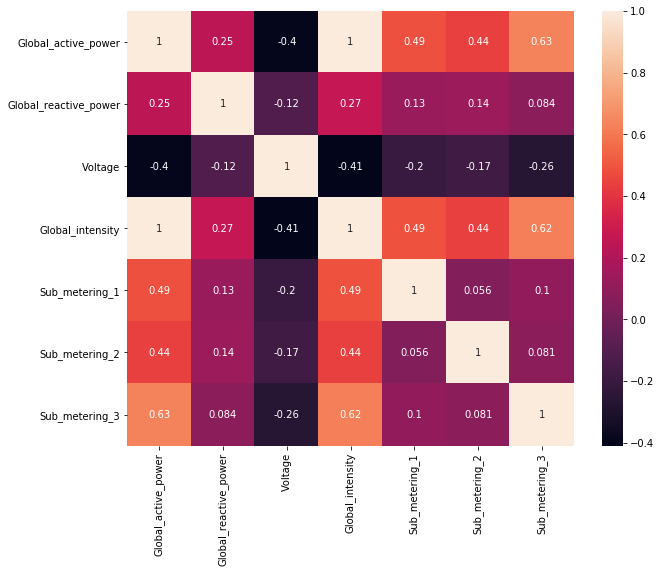

In [37]:
plt.figure(figsize=(10,8))
sns.heatmap(df_train.corr(),annot = True)

In [38]:
#sns.pairplot(df_train)

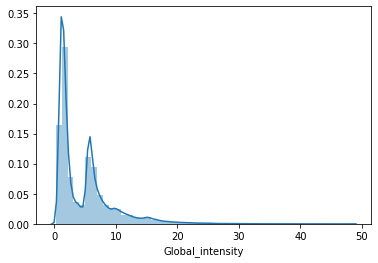

In [39]:
sns.distplot(df_train.Global_intensity)

In [40]:
df_train.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,1.840645e+06,1.840645e+06,1.840645e+06,1.840645e+06,1.840645e+06,1.840645e+06,1.840645e+06
mean,1.109721e+00,1.226022e-01,2.407981e+02,4.702740e+00,1.157097e+00,1.333931e+00,6.528684e+00
std,1.074799e+00,1.122469e-01,3.286067e+00,4.518602e+00,6.262711e+00,5.962560e+00,8.467266e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.100000e-01,4.800000e-02,2.389000e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.200000e-01,1.000000e-01,2.409800e+02,2.800000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.544000e+00,1.940000e-01,2.429000e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [41]:
df_train.Global_active_power.quantile([0.25,0.5,0.6,0.7,0.8,0.9,0.95,0.98,0.99])

0.25    0.310
0.50    0.620
0.60    1.276
0.70    1.442
0.80    1.730
0.90    2.514
0.95    3.334
0.98    4.196
0.99    4.916
Name: Global_active_power, dtype: float64

In [42]:
df_train.Global_reactive_power.quantile([0.25,0.5,0.6,0.7,0.8,0.9,0.95,0.98,0.99])

0.25    0.048
0.50    0.100
0.60    0.120
0.70    0.164
0.80    0.214
0.90    0.266
0.95    0.338
0.98    0.408
0.99    0.476
Name: Global_reactive_power, dtype: float64

In [43]:
df_train.Voltage.quantile([0.25,0.5,0.6,0.7,0.8,0.9,0.95,0.98,0.99])

0.25    238.90
0.50    240.98
0.60    241.70
0.70    242.47
0.80    243.39
0.90    244.74
0.95    245.96
0.98    247.35
0.99    248.25
Name: Voltage, dtype: float64

In [44]:
df_train.Global_intensity.quantile([0.25,0.5,0.6,0.7,0.8,0.9,0.95,0.98,0.99])

0.25     1.4
0.50     2.8
0.60     5.2
0.70     6.0
0.80     7.2
0.90    10.6
0.95    14.2
0.98    17.8
0.99    20.8
Name: Global_intensity, dtype: float64

In [45]:
df_train.Sub_metering_1.quantile([0.25,0.5,0.6,0.7,0.8,0.9,0.95,0.98,0.99])

0.25     0.0
0.50     0.0
0.60     0.0
0.70     0.0
0.80     0.0
0.90     0.0
0.95     1.0
0.98    37.0
0.99    38.0
Name: Sub_metering_1, dtype: float64

In [46]:
df_train.Sub_metering_2.quantile([0.25,0.5,0.6,0.7,0.8,0.9,0.95,0.98,0.99])

0.25     0.0
0.50     0.0
0.60     0.0
0.70     0.0
0.80     1.0
0.90     2.0
0.95     2.0
0.98    27.0
0.99    37.0
Name: Sub_metering_2, dtype: float64

In [47]:
df_train.Sub_metering_3.quantile([0.25,0.5,0.6,0.7,0.8,0.9,0.95,0.98,0.99])

0.25     0.0
0.50     1.0
0.60     1.0
0.70    17.0
0.80    18.0
0.90    18.0
0.95    19.0
0.98    19.0
0.99    20.0
Name: Sub_metering_3, dtype: float64

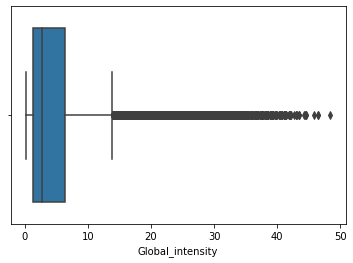

In [48]:
sns.boxplot(data = df_train, x = 'Global_intensity')

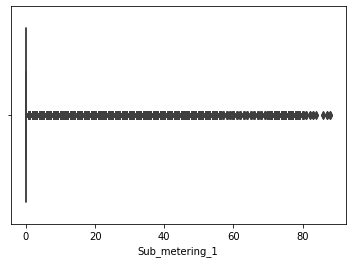

In [49]:
sns.boxplot(data = df_train, x = 'Sub_metering_1')

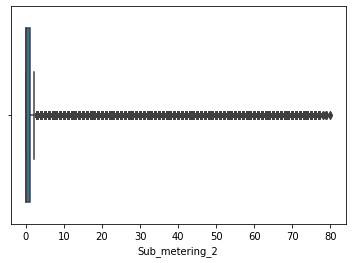

In [50]:
sns.boxplot(data = df_train, x = 'Sub_metering_2')

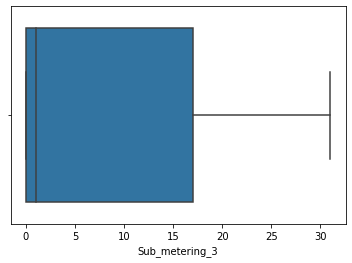

In [51]:
sns.boxplot(data = df_train, x = 'Sub_metering_3')

# Relationship Analysis with Predicting variables

In [52]:
df_train.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [53]:
features = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

Text(0, 0.5, 'Global_Intensity')

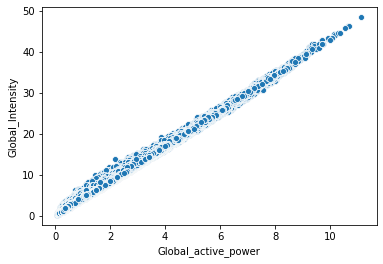

In [54]:
sns.scatterplot(df_train[features[0]],df_train['Global_intensity'])
plt.xlabel(features[0])
plt.ylabel('Global_Intensity')

In [55]:
# It has a linear relationship

Text(0, 0.5, 'Global_Intensity')

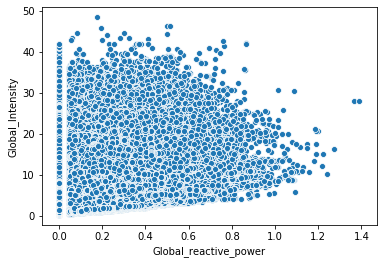

In [56]:
sns.scatterplot(df_train[features[1]],df_train['Global_intensity'])
plt.xlabel(features[1])
plt.ylabel('Global_Intensity')

Text(0, 0.5, 'Global_Intensity')

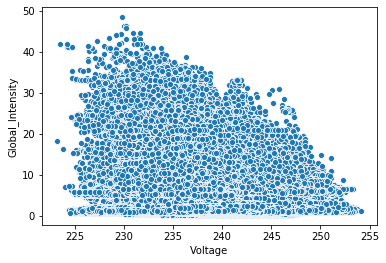

In [57]:
sns.scatterplot(df_train[features[2]],df_train['Global_intensity'])
plt.xlabel(features[2])
plt.ylabel('Global_Intensity')

Text(0, 0.5, 'Global_Intensity')

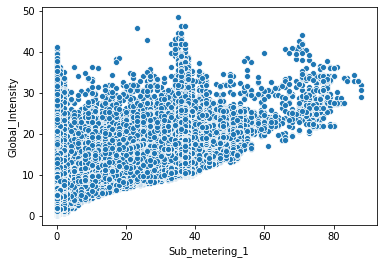

In [58]:
sns.scatterplot(df_train[features[3]],df_train['Global_intensity'])
plt.xlabel(features[3])
plt.ylabel('Global_Intensity')

Text(0, 0.5, 'Global_Intensity')

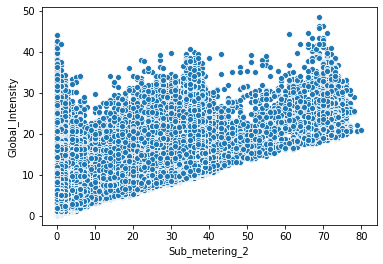

In [59]:
sns.scatterplot(df_train[features[4]],df_train['Global_intensity'])
plt.xlabel(features[4])
plt.ylabel('Global_Intensity')

Text(0, 0.5, 'Global_Intensity')

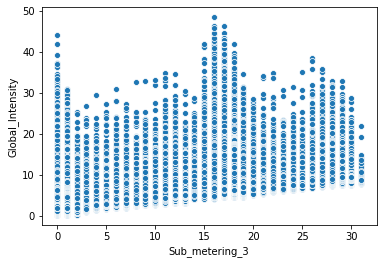

In [60]:
sns.scatterplot(df_train[features[5]],df_train['Global_intensity'])
plt.xlabel(features[5])
plt.ylabel('Global_Intensity')

# We can see from plots that there are no major outliers so we can continue to build our model

In [61]:
df_train.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0


# Train Test Split

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X = df_train.drop('Global_intensity',1)
y = df_train.Global_intensity

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [65]:
X_train.head()

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3
1404156,0.214,0.104,242.90,0.0,0.0,1.0
767340,1.350,0.074,233.07,0.0,2.0,17.0
1018536,5.310,0.178,236.76,38.0,0.0,18.0
1616603,1.694,0.000,238.26,1.0,0.0,18.0
351562,0.268,0.136,241.45,0.0,1.0,0.0


# Scaling

In [66]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()

In [67]:
#var = X_train.columns.to_list()
#var

In [68]:
#X_train[var] = scaler.fit_transform(X_train[var])
#X_train.head()

In [69]:
#X_test[var] = scaler.transform(X_test[var])

In [70]:
# With the help of scaling we can speed up the Gradient Desent calculations

# Creating model with Stats model in order to check the statistical significance of each predictors

In [71]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3
1404156,1.0,0.214,0.104,242.90,0.0,0.0,1.0
767340,1.0,1.350,0.074,233.07,0.0,2.0,17.0
1018536,1.0,5.310,0.178,236.76,38.0,0.0,18.0
1616603,1.0,1.694,0.000,238.26,1.0,0.0,18.0
351562,1.0,0.268,0.136,241.45,0.0,1.0,0.0


In [72]:
stat = sm.OLS(y_train.values,X_train_sm).fit()
stat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.502e+08
Date:                Mon, 20 Jul 2020   Prob (F-statistic):               0.00
Time:                        17:02:45   Log-Likelihood:             4.4813e+05
No. Observations:             1288451   AIC:                        -8.963e+05
Df Residuals:                 1288444   BIC:                        -8.962e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     4.7338      0.012    391.001      0.000       4.710       4.758
Global_active_power       4.1796      0.000   1.53e+04      0.000       4.179       4.180
Global_reactive_power     0.7485      0.001    537.607      0.000       0.746       0.751
Voltage                  -0.0196      5e-05   -392.067      0.000      -0.020      -0.019
Sub_metering_1            0.0025   3.03e-05     82.844      0.000       0.002       0.003
Sub_metering_2            0.0033   3.08e-05    106.523      0.000       0.003       0.003
Sub_metering_3           -0.0077    2.6e-05   -295.170      0.000      -0.008      -0.008
==============================================================================
Omnibus:                   950454.143   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         36180849.052
Skew:                           3.157   Prob(JB):                         0.00
Kurtosis:                      28.181   Cond. No.                     1.94e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
# Here all the p values are less then 0.05 hence all the variables are significant enoght to contribute to the result

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, x) for x in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF')
vif

,features,VIF
4,Sub_metering_2,1.56
3,Sub_metering_1,1.65
1,Global_reactive_power,2.36
2,Voltage,3.04
5,Sub_metering_3,3.42
0,Global_active_power,7.49


### Train accuracy

In [75]:
from sklearn import metrics

In [76]:
train_pred = stat.predict(X_train_sm)

In [77]:
np.sqrt(metrics.mean_squared_error(y_train,train_pred))

0.1708881999396448

In [78]:
metrics.r2_score(y_train,train_pred)

0.9985719044941842

### Test Acuracy

In [79]:
test_pred = stat.predict(sm.add_constant(X_test))

In [80]:
np.sqrt(metrics.mean_squared_error(y_test,test_pred))

0.17001312204533472

In [81]:
metrics.r2_score(y_test,test_pred)

0.9985792995499272

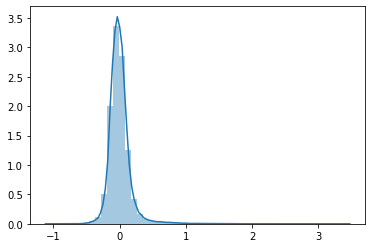

In [82]:
sns.distplot(list(y_test.values - test_pred.values))

In [83]:
# As per assumptions the errors are normally distributed and centered at 0

# Model with SKLEARN

In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
ln = LinearRegression()

In [86]:
ln = ln.fit(X_train,y_train)

### Train Accuracy

In [87]:
train_pred1 = ln.predict(X_train)

In [88]:
metrics.r2_score(y_train,train_pred1)

0.9985719044941842

In [89]:
np.sqrt(metrics.mean_squared_error(y_train,train_pred1))

0.17088819993964474

### Test Accuracy

In [90]:
test_pred1 = ln.predict(X_test)

In [91]:
metrics.r2_score(y_test,test_pred1)

0.9985792995499272

In [92]:
np.sqrt(metrics.mean_squared_error(y_test,test_pred1))

0.17001312204533467

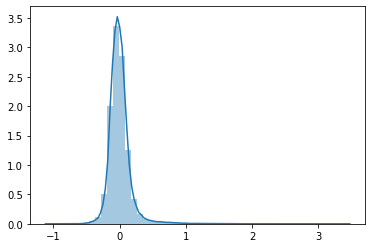

In [93]:
sns.distplot(list(y_test - test_pred1))

In [94]:
# As per assumptions the errors are normally distributed and centered at 0

# Crossval Score

In [95]:
from sklearn.model_selection import cross_val_score

In [96]:
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()

In [97]:
cross_val_score(ln,X_train,y_train,cv = 10, n_jobs=-1)

array([0.99856142, 0.99855304, 0.99855194, 0.99861296, 0.9985951 ,
       0.99857275, 0.99856027, 0.99858794, 0.99856351, 0.9985594 ])

In [98]:
val= [0.99857494, 0.99855969, 0.99857092, 0.998576  , 0.99857535,
       0.9985617 , 0.99859042, 0.99857174, 0.99857466, 0.99857552]

In [99]:
np.mean(val)

0.9985730939999999

# With Random Forest Model

In [100]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [101]:
rf= rf.fit(X_train,y_train) # Well it takes feew mins to commpute as RF are time consuming

### Train Accuracy

In [102]:
metrics.r2_score(y_train, rf.predict(X_train))

0.9998745182604756

In [103]:
np.sqrt(metrics.mean_squared_error(y_train, rf.predict(X_train)))

0.05065516265366776

### Test Accuracy

In [104]:
pred_rf = rf.predict(X_test)

In [105]:
metrics.r2_score(y_test,pred_rf)

0.9991746504201392

In [106]:
np.sqrt(metrics.mean_squared_error(y_test,pred_rf))

0.1295836327729849

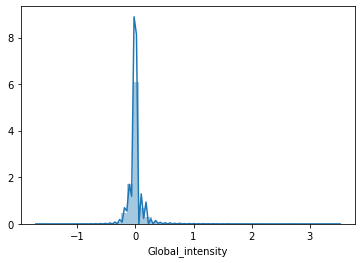

In [107]:
sns.distplot(y_test - pred_rf)

In [108]:
# We can tune parameters if we didn't get proper results at test accuracy

# Transforming test set

In [109]:
df_valid.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0.376,0.208,237.01,1.8,0.0,0.0,1.0
1,0.380,0.218,239.24,1.8,0.0,0.0,0.0
2,0.378,0.216,238.64,1.8,0.0,0.0,1.0
3,0.378,0.218,239.13,1.8,0.0,0.0,1.0
4,0.376,0.214,238.32,1.8,0.0,0.0,0.0


In [110]:
df_valid

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0.376,0.208,237.01,1.8,0.0,0.0,1.0
1,0.380,0.218,239.24,1.8,0.0,0.0,0.0
2,0.378,0.216,238.64,1.8,0.0,0.0,1.0
3,0.378,0.218,239.13,1.8,0.0,0.0,1.0
4,0.376,0.214,238.32,1.8,0.0,0.0,0.0
...,...,...,...,...,...,...,...
199995,0.946,0.000,240.43,4.0,0.0,0.0,0.0
199996,0.944,0.000,240.00,4.0,0.0,0.0,0.0
199997,0.938,0.000,239.82,3.8,0.0,0.0,0.0
199998,0.934,0.000,239.70,3.8,0.0,0.0,0.0


In [111]:
X_valid = df_valid.drop('Global_intensity',1)
y_valid = df_valid.Global_intensity

# Transform test data

In [112]:
#X_valid[var] = scaler.transform(X_valid[var])
#X_valid.head()

# Validation from Stats Model

In [113]:
stat_pred = stat.predict(sm.add_constant(X_valid))

In [114]:
metrics.r2_score(y_valid,stat_pred)

0.9979091416403256

In [115]:
np.sqrt(metrics.mean_squared_error(y_valid,stat_pred))

0.1661338867183635

In [116]:
y_valid.values

array([1.8, 1.8, 1.8, ..., 3.8, 3.8, 3.8])

In [117]:
y_valid.values

array([1.8, 1.8, 1.8, ..., 3.8, 3.8, 3.8])

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


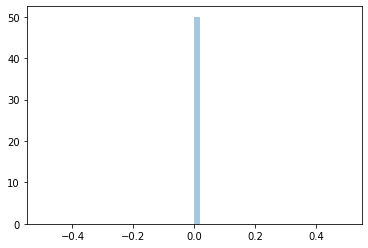

In [118]:
sns.distplot(y_valid.values- y_valid.values)

# Validation from SKLEARN

In [119]:
ln_pred = ln.predict(X_valid)

In [120]:
metrics.r2_score(y_valid,ln_pred)

0.9979091416403255

In [121]:
np.sqrt(metrics.mean_squared_error(y_valid,ln_pred))

0.16613388671836896

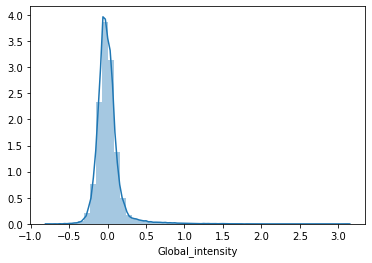

In [122]:
sns.distplot(y_valid-ln_pred)

In [123]:
ln.predict(X_valid[0:10])

array([1.80943788, 1.79763512, 1.79184758, 1.78374371, 1.79594871,
       4.47096718, 4.68760179, 4.82170042, 4.84580954, 4.59357775])

In [124]:
y_valid[0:10]

0    1.8
1    1.8
2    1.8
3    1.8
4    1.8
5    4.6
6    4.6
7    4.8
8    4.8
9    4.6
Name: Global_intensity, dtype: float64

# Validation from Random Forest

In [125]:
rf_pred = rf.predict(X_valid)

In [126]:
metrics.r2_score(y_valid,rf_pred)

0.9986579963774425

In [127]:
np.sqrt(metrics.mean_squared_error(y_valid,rf_pred))

0.13309837795889462

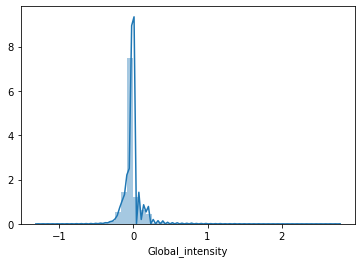

In [128]:
sns.distplot(y_valid-rf_pred)

# Train

| Algorithm          | R2_Score | RMSE    |
|--------------------|---------|----------|
| Stats              | 99.85    | 0.17     |
| Sklearn            | 99.85    | 0.17     |
| Random Forest      | 99.98    | 0.050     


# Test

| Algorithm          | R2_Score | RMSE    |
|--------------------|---------|----------|
| Stats              | 99.85    | 0.17     |
| Sklearn            | 99.85    | 0.17     |
| Random Forest      | 99.92    | 0.12     |


# Valid

| Algorithm          | R2_Score | RMSE    |
|--------------------|---------|----------|
| Stats              | 99.79    | 0.16     |
| Sklearn            | 99.79    | 0.16     |
| Random Forest      | 99.86    | 0.13     |


# Conclusion

Hence by looking at the whole analysis we can say that Linear Regression performs better even though it has a very little difference in r2_score with random forest, but random forest takes time to compute the model so we can compromise the diffeence in accuracies of the model with linear regression algorith

- Stats model and sklearn model can be used to build the model the only difference is the stats model gives us the statistical insight of it with mnay values like adj r2_score and p values can also be computer with it, where are sklearn siply gives the r2 score

In [129]:
import pickle
pickle.dump(ln, open('model.pkl','wb'))

In [130]:
pd.__version__

'1.0.1'